In [10]:
 pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
import mysql.connector

In [12]:

import mysql.connector
#
from mysql.connector import Error
#
try:
    connection = mysql.connector.connect(host='localhost',
                                        database='ehubwash',
                                        user='root',
                                        password='root',
                                        auth_plugin = 'mysql_native_password')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Your connected to database: ", record)
#
        sql_select_Query = "select Name from user;"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        print("Names of all the user :\n")
        for row in records:
            print('Names =',row[0],"\n")
#
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if (connection.is_connected()):
        #cursor.close()
        #connection.close()
        print("MySQL connection is connected")



Error while connecting to MySQL 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


NameError: name 'connection' is not defined

In [ ]:
#Display username whose issue status are InProgress
mycursor = connection.cursor()
mycursor.execute('''select u.name , h.status 
                    from user u inner join helpdesk h 
                    on u.UserID = h.UserID  
                    where h.status = 'InProgress';''')

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

In [5]:
#Display username who is using hubid 20
mycursor = connection.cursor()
mycursor.execute('''select u.name
                    from user u inner join selecthub s
                    on u.UserID = s.UserID 
                    where s.HubID = 20;''')

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

NameError: name 'connection' is not defined

In [6]:
import pandas as pd


In [7]:
connection

NameError: name 'connection' is not defined

In [13]:
df = pd.read_sql_query("SELECT * FROM helpdesk", connection)
df.head(10)


C:\Users\agane\AppData\Local\Temp\ipykernel_8088\1421664824.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM helpdesk", connection)


,HelpdeskID,UserID,Issue,Status
0,1,78,Etiam imperdiet dictum magna. Ut tincidunt orc...,resolved
1,2,4,"neque. In ornare sagittis felis. Donec tempor,...",open
2,3,84,"vel, convallis in, cursus et, eros. Proin ultr...",resolved
3,4,57,massa lobortis ultrices. Vivamus rhoncus. Done...,resolved
4,5,57,"et magnis dis parturient montes, nascetur ridi...",resolved
5,6,49,"mollis. Phasellus libero mauris, aliquam eu, a...",closed
6,7,67,Vestibulum ante ipsum primis in faucibus orci ...,closed
7,8,67,"iaculis nec, eleifend non, dapibus rutrum, jus...",InProgress
8,9,36,"erat. Sed nunc est, mollis non, cursus non, eg...",open
9,10,35,diam luctus lobortis. Class aptent taciti soci...,resolved


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

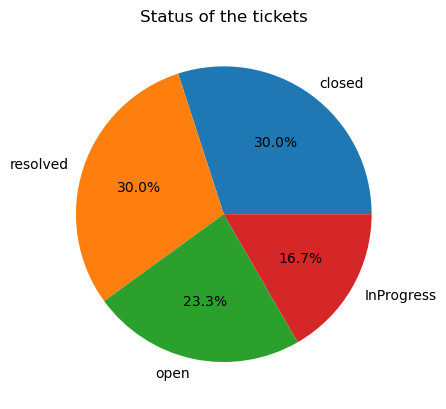

In [16]:
status_counts = df.groupby('Status')['Status'].count().sort_values(ascending=False)
# Extract vehicle types and counts for the pie chart
status_types = status_counts.index.to_numpy()
status_counts = status_counts.to_numpy()
# Create the pie chart
plt.pie(status_counts, labels=status_types, autopct="%1.1f%%")
# Add a title
plt.title("Status of the tickets")
# Display the chart
plt.show()

In [18]:
df2 = pd.read_sql_query("SELECT * FROM takesorder", connection)
df2.head(10)


C:\Users\agane\AppData\Local\Temp\ipykernel_8088\156461062.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query("SELECT * FROM takesorder", connection)


,OrderID,HubID
0,26,2
1,33,3
2,55,3
3,23,4
4,39,4
5,29,7
6,52,7
7,3,8
8,49,8
9,52,8


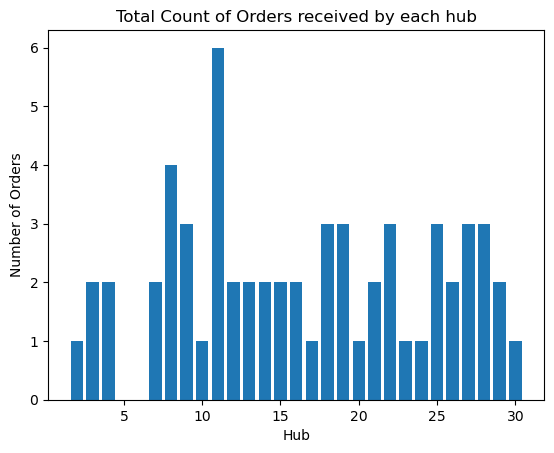

In [20]:
Hub_Order_counts = df2['HubID'].value_counts().sort_index(ascending=True) 

# Create the bar chart
plt.bar(Hub_Order_counts.index, Hub_Order_counts.values ) 
plt.xlabel('Hub')
plt.ylabel('Number of Orders')
plt.title('Total Count of Orders received by each hub')
plt.xticks(rotation=0) 
plt.show()

In [21]:
df3 = pd.read_sql_query("SELECT * FROM Payment", connection)
df3.head(10)

C:\Users\agane\AppData\Local\Temp\ipykernel_8088\1927049634.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query("SELECT * FROM Payment", connection)


,PaymentID,OrderID,TotalAmount,PaymentMethod
0,1,19,$28.15,CreditCard
1,2,4,$21.83,CreditCard
2,3,59,$39.86,OnlinePayment
3,4,9,$81.38,DebitCard
4,5,50,$26.38,DebitCard
5,6,2,$53.78,DebitCard
6,7,43,$58.17,BankTransfer
7,8,14,$24.40,Cash
8,9,35,$61.42,OnlinePayment
9,10,1,$19.13,DebitCard


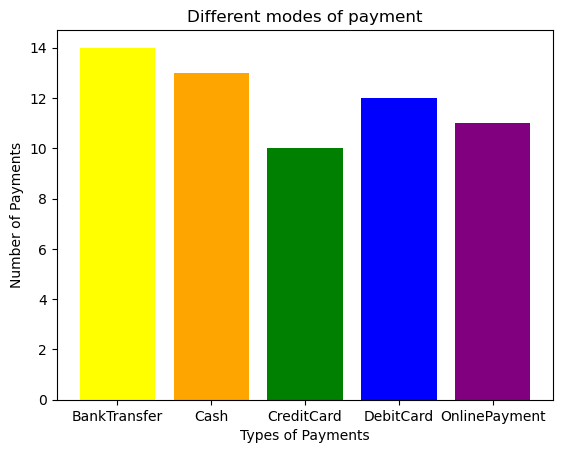

In [25]:
method_counts = df3['PaymentMethod'].value_counts().sort_index(ascending=True) 
colors =['yellow', 'orange', 'green', 'blue', 'purple']
# Create the bar chart
plt.bar(method_counts.index, method_counts.values, color = colors ) 
plt.xlabel('Types of Payments')
plt.ylabel('Number of Payments')
plt.title('Different modes of payment')
plt.xticks(rotation=0) 
plt.show()

In [1]:
method_counts = df3['PaymentMethod'].value_counts().sort_index(ascending=True)

# Generate x and y data for scatter plot
x = method_counts.index
y = method_counts.values

# Plot the scatter plot
plt.scatter(x, y, color='red')

# Add labels and title
plt.xlabel('Types of Payments')
plt.ylabel('Number of Payments')
plt.title('Scatter Plot of Different modes of payment')

# Show the plot
plt.show()

NameError: name 'df3' is not defined